<a href="https://colab.research.google.com/github/adamhuzaini/taks-taxi/blob/master/Arabica_Coffee_Grading_22_11_5192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# 1. Profiling Dataset
# Load dataset
data_path = '/content/arabica_data_cleaned.csv'  # Sesuaikan path jika perlu
data = pd.read_csv(data_path)

In [3]:
# Informasi dataset
print("Informasi Dataset:")
data.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null 

In [4]:
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
        Unnamed: 0  Number.of.Bags        Aroma       Flavor   Aftertaste  \
count  1311.000000     1311.000000  1311.000000  1311.000000  1311.000000   
mean    656.000763      153.887872     7.563806     7.518070     7.397696   
std     378.598733      129.733734     0.378666     0.399979     0.405119   
min       1.000000        0.000000     0.000000     0.000000     0.000000   
25%     328.500000       14.500000     7.420000     7.330000     7.250000   
50%     656.000000      175.000000     7.580000     7.580000     7.420000   
75%     983.500000      275.000000     7.750000     7.750000     7.580000   
max    1312.000000     1062.000000     8.750000     8.830000     8.670000   

           Acidity         Body      Balance   Uniformity   Clean.Cup  \
count  1311.000000  1311.000000  1311.000000  1311.000000  1311.00000   
mean      7.533112     7.517727     7.517506     9.833394     9.83312   
std       0.381599     0.359213     0.406316     0.559343     0.

In [5]:
print("\nCek Missing Values:")
print(data.isnull().sum())


Cek Missing Values:
Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                148
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defect


Visualisasi Distribusi Data:


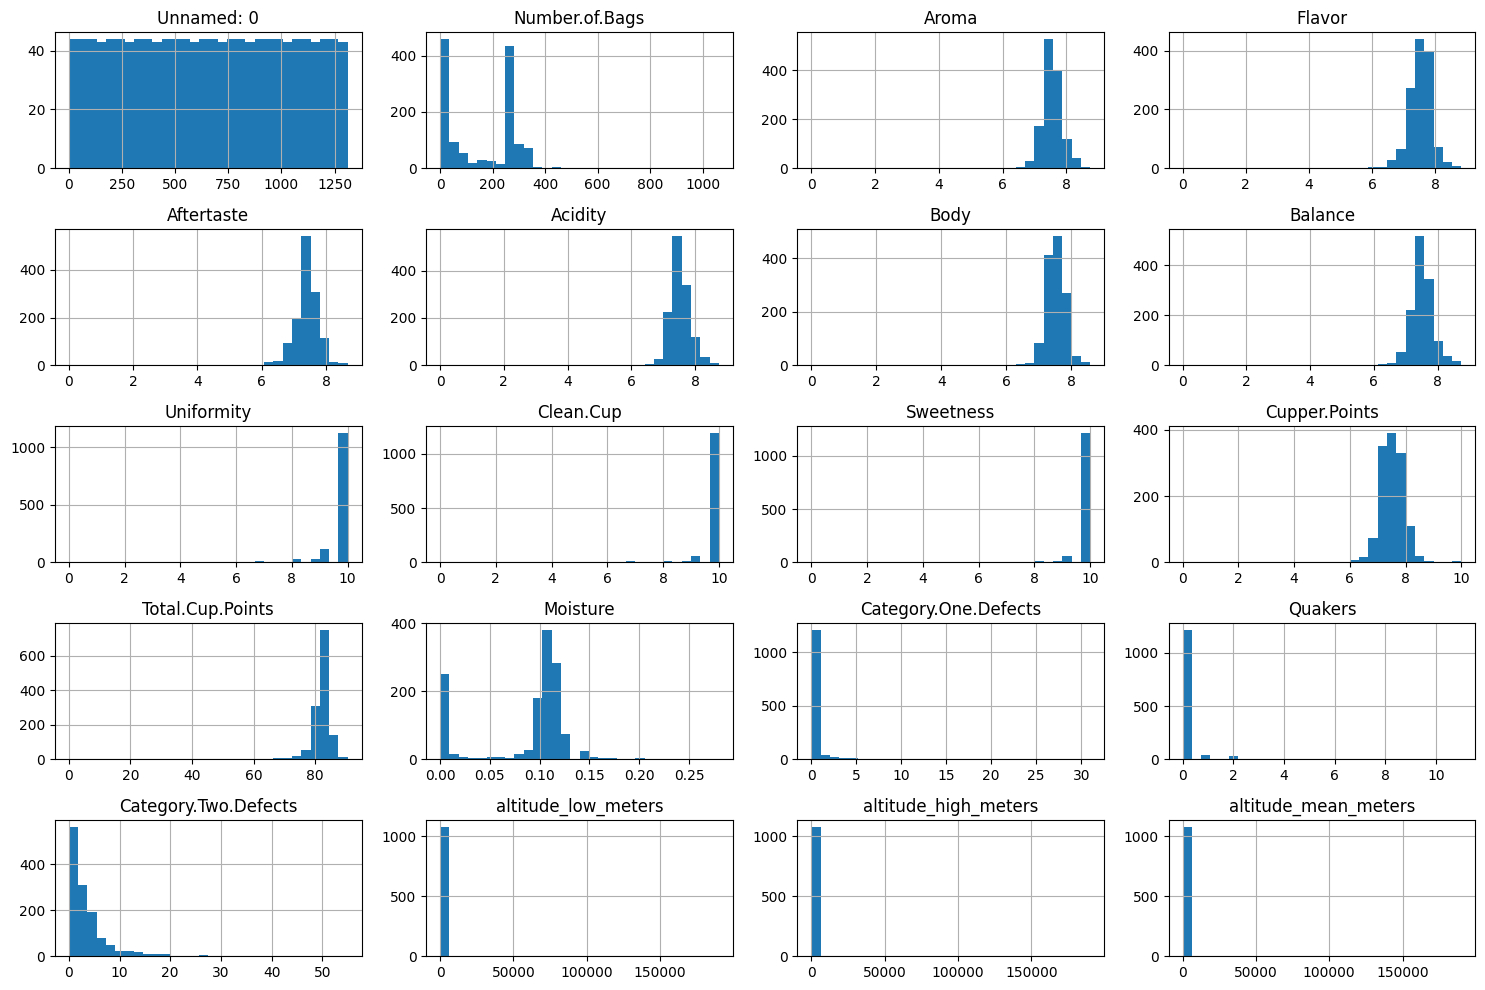

In [6]:
# Plot distribusi data
print("\nVisualisasi Distribusi Data:")
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [7]:
# 2. Data Preprocessing
# Penanganan missing values
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

print("\nMissing values setelah preprocessing:")
print(data.isnull().sum())


Missing values setelah preprocessing:
Unnamed: 0               0
Species                  0
Owner                    0
Country.of.Origin        0
Farm.Name                0
Lot.Number               0
Mill                     0
ICO.Number               0
Company                  0
Altitude                 0
Region                   0
Producer                 0
Number.of.Bags           0
Bag.Weight               0
In.Country.Partner       0
Harvest.Year             0
Grading.Date             0
Owner.1                  0
Variety                  0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                    0
Category.Two.Def

<ipython-input-7-ca3c4586d287>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-7-ca3c4586d287>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
# Encoding data kategorikal jika ada
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Kolom kategorikal: {categorical_cols}")
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

Kolom kategorikal: Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Bag.Weight', 'In.Country.Partner', 'Harvest.Year', 'Grading.Date',
       'Owner.1', 'Variety', 'Processing.Method', 'Color', 'Expiration',
       'Certification.Body', 'Certification.Address', 'Certification.Contact',
       'unit_of_measurement'],
      dtype='object')


In [9]:
# Normalisasi jika diperlukan
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("Data setelah preprocessing:")
print(data.head())

Data setelah preprocessing:
   Unnamed: 0  Species  Owner  Country.of.Origin  Farm.Name  Lot.Number  Mill  \
0   -1.730726        0    204                  8        371          23   286   
1   -1.728084        0    204                  8        371          23   286   
2   -1.725441        0    123                  9        438          23    49   
3   -1.722799        0    300                  8        523          23   411   
4   -1.720157        0    204                  8        371          23   286   

   ICO.Number  Company  Altitude  ...  Color  Category.Two.Defects  \
0         458      167       222  ...      2             -0.671596   
1         458      167       222  ...      2             -0.484621   
2           1      248       163  ...      2             -0.671596   
3           1      262       206  ...      2             -0.297647   
4         458      167       222  ...      2             -0.297647   

   Expiration  Certification.Body  Certification.Address  \
0   

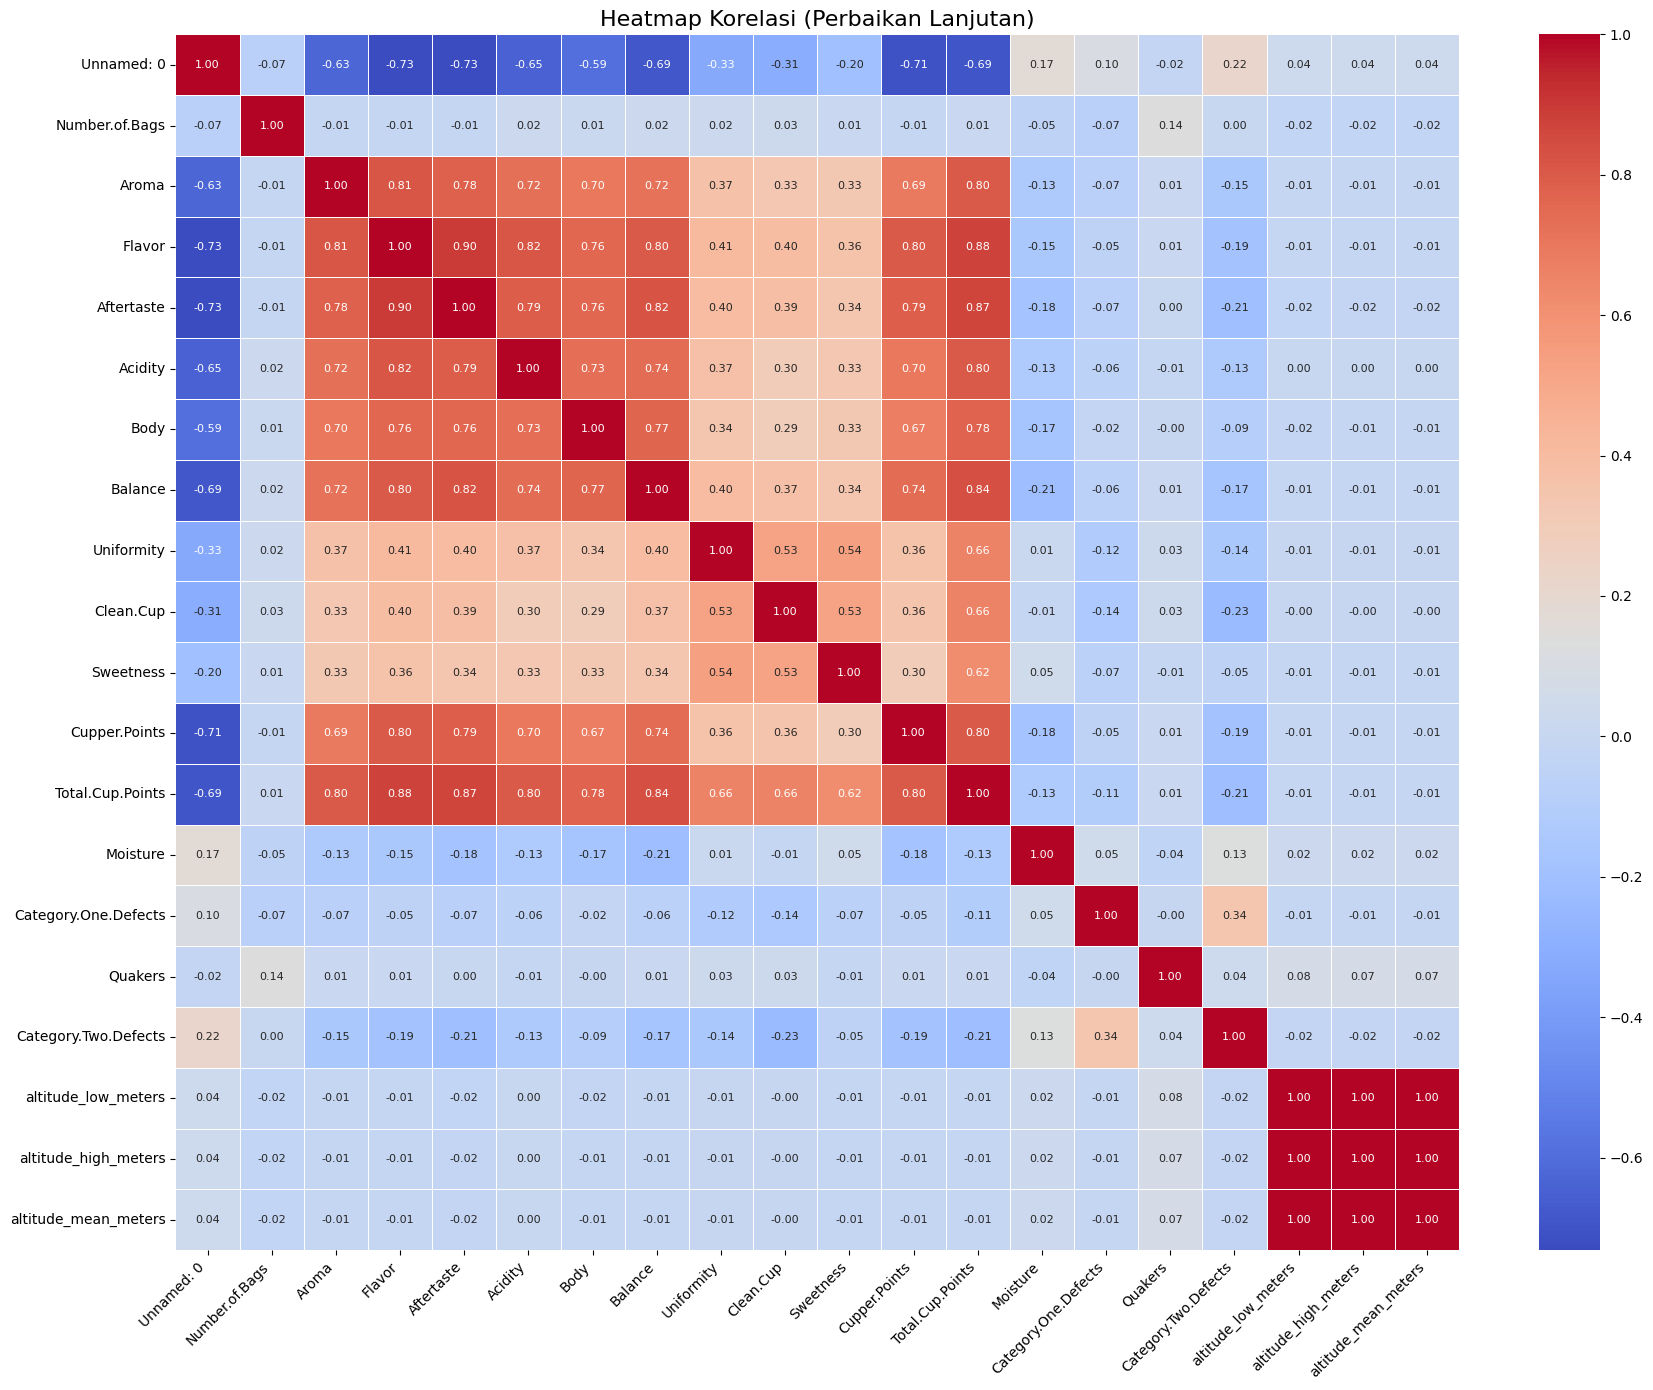

In [10]:
# Filter hanya fitur numerik untuk heatmap korelasi
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Mengatur ukuran heatmap dan label
plt.figure(figsize=(18, 14))  # Perbesar ukuran
sns.heatmap(numeric_data.corr(),
            annot=True,  # Menampilkan nilai korelasi
            cmap='coolwarm',
            fmt='.2f',
            annot_kws={"size": 8},  # Ukuran font untuk nilai korelasi
            linewidths=0.5,  # Jarak antar kotak
            cbar=True)

# Mengatur rotasi label untuk kolom dan baris
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heatmap Korelasi (Perbaikan Lanjutan)', fontsize=16)
plt.tight_layout()
plt.show()


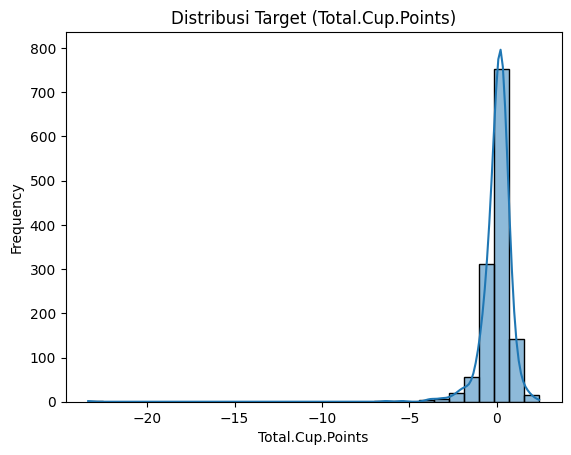

In [11]:
# Analisis distribusi target
sns.histplot(data['Total.Cup.Points'], kde=True, bins=30)
plt.title('Distribusi Target (Total.Cup.Points)')
plt.xlabel('Total.Cup.Points')
plt.ylabel('Frequency')
plt.show()

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleksi fitur
X = data.drop('Total.Cup.Points', axis=1)
y = data['Total.Cup.Points']

# Pilih fitur terbaik menggunakan SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f"Fitur terpilih: {selected_features}")


Fitur terpilih: Index(['Unnamed: 0', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Cupper.Points'],
      dtype='object')


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import joblib

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Modeling dengan Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Simpan model
model_path = 'gradient_boosting_model.pkl'
joblib.dump(model, model_path)
print(f"Model disimpan di: {model_path}")


Model disimpan di: gradient_boosting_model.pkl



Mean Squared Error (MSE): 0.0005808407290058467
Mean Absolute Error (MAE): 0.0130175833394692
R^2 Score: 0.9988524550423916


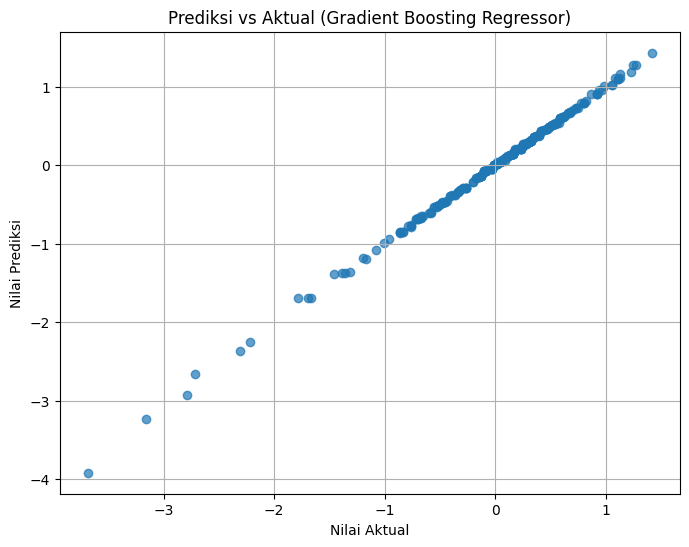

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Prediksi vs Aktual (Gradient Boosting Regressor)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.grid()
plt.show()
